## Pandas functions

In [1]:
import pandas as pd
# plot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/archive/dataset.csv')
df.head()

,Unnamed: 0,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
0,0,GSM877126,62,A,Male,Left,108,0,1,0
1,1,GSM877127,77,B,NaN,Left,40,1,1,0
2,2,GSM877128,66,C,Female,Left,49,0,1,0
3,3,GSM877129,72,D,Female,Left,45,0,1,1
4,4,GSM877130,75,C,Male,Left,40,0,0,1


In [3]:
# df.dtypes
# df.describe()
# df.corr()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       62 non-null     int64 
 1   ID_REF           62 non-null     object
 2   Age (in years)   62 non-null     int64 
 3   Dukes Stage      62 non-null     object
 4   Gender           61 non-null     object
 5   Location         62 non-null     object
 6   DFS (in months)  62 non-null     int64 
 7   DFS event        62 non-null     int64 
 8   Adj_Radio        62 non-null     int64 
 9   Adj_Chem         62 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 5.0+ KB


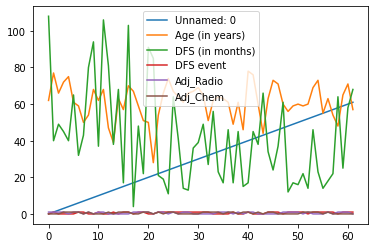

In [4]:
df.plot()

In [5]:
nans = df.shape[0] - df.dropna().shape[0]
print ("%d rows have missing values in the data" %nans)
df.isnull().sum()

1 rows have missing values in the data


Unnamed: 0         0
ID_REF             0
Age (in years)     0
Dukes Stage        0
Gender             1
Location           0
DFS (in months)    0
DFS event          0
Adj_Radio          0
Adj_Chem           0
dtype: int64

In [6]:
df.Gender.fillna('Not known',inplace=True)
nans = df.shape[0] - df.dropna().shape[0]
print ("%d rows have missing values in the data" %nans)
df.isnull().sum()

0 rows have missing values in the data


Unnamed: 0         0
ID_REF             0
Age (in years)     0
Dukes Stage        0
Gender             0
Location           0
DFS (in months)    0
DFS event          0
Adj_Radio          0
Adj_Chem           0
dtype: int64

In [7]:
df["Age (in years)"].max()

78

In [8]:
df = df.rename(columns={"Age (in years)": "Age", "DFS (in months)": "DFS", "Dukes Stage": "Dstage"})
df.head()

,Unnamed: 0,ID_REF,Age,Dstage,Gender,Location,DFS,DFS event,Adj_Radio,Adj_Chem
0,0,GSM877126,62,A,Male,Left,108,0,1,0
1,1,GSM877127,77,B,Not known,Left,40,1,1,0
2,2,GSM877128,66,C,Female,Left,49,0,1,0
3,3,GSM877129,72,D,Female,Left,45,0,1,1
4,4,GSM877130,75,C,Male,Left,40,0,0,1


In [9]:
df.sort_values(by=['Age', 'DFS'],ascending=[True, False],inplace=True)
df.head()

,Unnamed: 0,ID_REF,Age,Dstage,Gender,Location,DFS,DFS event,Adj_Radio,Adj_Chem
21,21,GSM877147,28,B,Male,Right,85,0,0,0
13,13,GSM877139,39,D,Male,Rectum,38,1,0,0
43,43,GSM877169,44,D,Female,Left,66,0,0,0
39,39,GSM877165,46,C,Male,Left,15,0,0,1
12,12,GSM877138,47,A,Male,Right,81,0,0,1


## Numpy and scikit learn functions

In [10]:
import numpy as np

data_list = df.loc[:,'DFS']
data_arr = np.array(data_list)

In [11]:
data_arr = data_arr.reshape(-1, 1)
data_arr = data_arr[: 10]

print(data_arr.min())

data_arr = data_arr + 2
print(data_arr)

print(np.sort(data_arr))

15
[[87]
 [40]
 [68]
 [17]
 [83]
 [66]
 [19]
 [93]
 [45]
 [29]]
[[87]
 [40]
 [68]
 [17]
 [83]
 [66]
 [19]
 [93]
 [45]
 [29]]


In [12]:
from sklearn import preprocessing

data_binarized = preprocessing.Binarizer(threshold=50).transform(data_arr)
print("\nBinarized data:\n", data_binarized)

print("Mean =", data_arr.mean(axis=0))

data_normalized_l1 = preprocessing.normalize(data_arr, norm='l1', axis=0)
print("\nL1 normalized data:\n", data_normalized_l1)


Binarized data:
 [[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]]
Mean = [54.7]

L1 normalized data:
 [[0.15904936]
 [0.07312614]
 [0.12431444]
 [0.03107861]
 [0.15173675]
 [0.12065814]
 [0.03473492]
 [0.17001828]
 [0.08226691]
 [0.05301645]]


In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [14]:
print(train.shape, test.shape)

(49, 10) (13, 10)


## Matplotlib

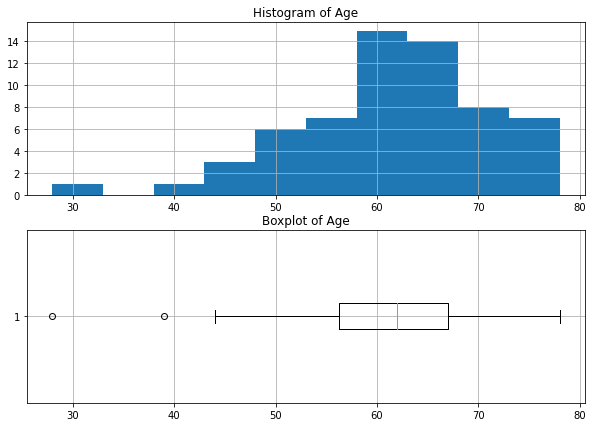

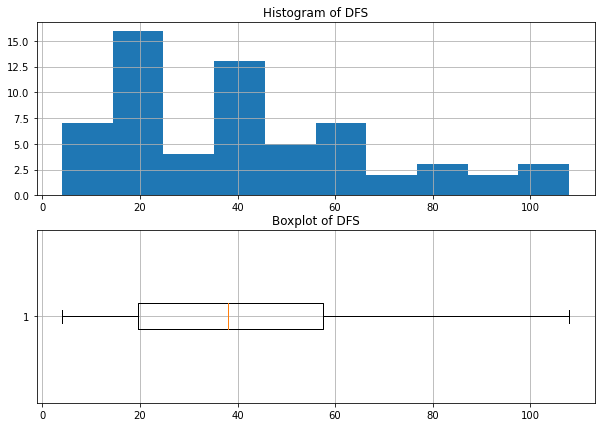

In [15]:
# Visualizing numerical data with histgram and box plots
features_num = ['Age', 'DFS']

# plot distributions
for f in features_num:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
    
    ax1.hist(df[f])
    ax1.grid()
    ax1.set_title('Histogram of ' + f)
    
    ax2.boxplot(df[f], vert=False)
    ax2.grid()   
    ax2.set_title('Boxplot of ' + f)
    
    plt.show()

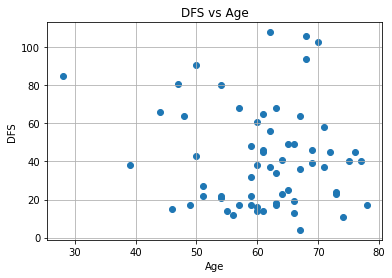

In [16]:
plt.scatter(df['Age'], df['DFS'])
plt.title('DFS vs Age')
plt.xlabel('Age')
plt.ylabel('DFS')
plt.grid()
plt.show()

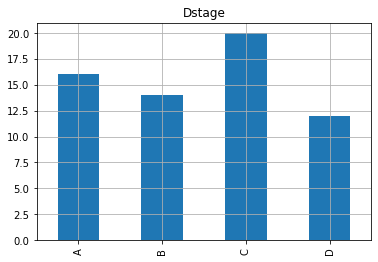

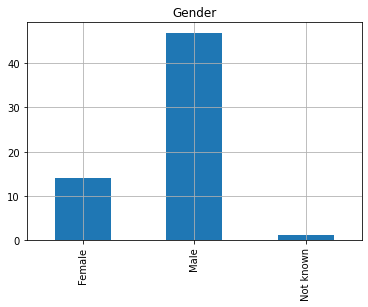

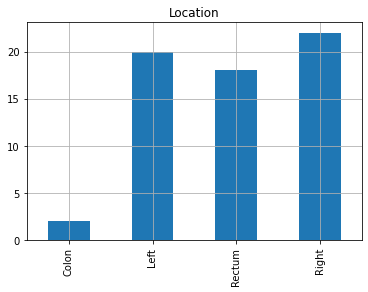

In [17]:
# Visualizing categorical data with bar graphs
features_cat = ['Dstage', 'Gender', 'Location']

for f in features_cat:
    df[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()